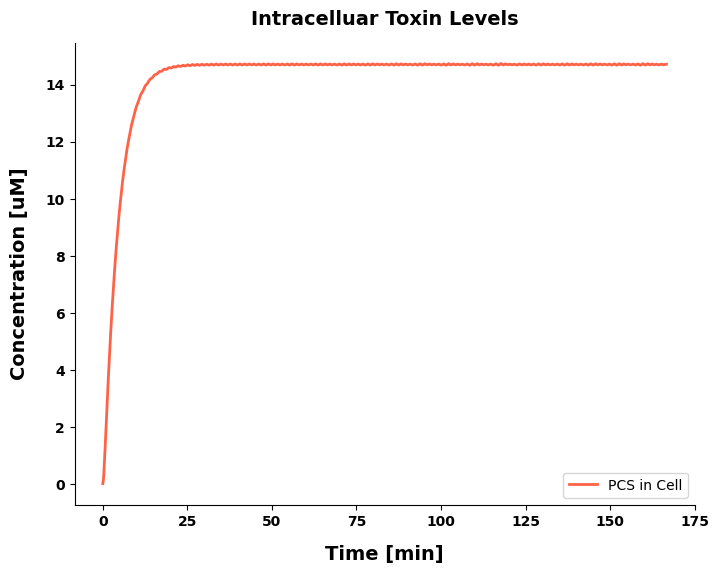

Maximum PCS_C: 14.73 µM at time: 117.78 minutes


In [12]:
#EXPERIMENTAL MODEL
# Steady-state dynamics under healthy and uremic conditions


import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
 
V_Cell_Monolayer = 3.2e-07
V_Mem = 0.0032
V_Well = 0.0001
 
initial_OAT1 = 0.190962
initial_PCS_C = 0
initial_PCS_OAT1 = 0
Km_Efflux = 69
Kr_Uptake = 0.000
Kr_dissociation = 0.000
Vmax_Efflux = 0.0003986
 
#initial_PCS_B = 10    # Healthy
initial_PCS_B = 200    # Uremic

# Healthy Condition 
#Kf_Uptake = 1.44e-05
#Kf_dissociation = 5.78e-04 

# Uremic Condition 
Kf_Uptake = 1.99e-05
Kf_dissociation = 4.05e-04 

params = [Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, Vmax_Efflux, Km_Efflux, V_Mem, V_Well, V_Cell_Monolayer]
 
def model(t, y, params):
 
    # Unpack state variables
    PCS_B, OAT1,  PCS_OAT1, PCS_C  = y
 
    Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, Vmax_Efflux, Km_Efflux, V_Mem, V_Well, V_Cell_Monolayer = params
 
    dPCS_Bdt = (-((Kf_Uptake * OAT1 * PCS_B + (-Kr_Uptake * PCS_OAT1)) * V_Mem) + ( (Vmax_Efflux * PCS_C) / ( Km_Efflux + PCS_C)) * V_Mem) / V_Well
 
    dOAT1dt = (-((Kf_Uptake * OAT1 * PCS_B + (-Kr_Uptake * PCS_OAT1)) * V_Mem) + (
            (Kf_dissociation * PCS_OAT1 + (-Kr_dissociation * OAT1 * PCS_C)) * V_Mem)) / V_Mem
 
    dPCS_OAT1dt = (((Kf_Uptake * OAT1 * PCS_B + (-Kr_Uptake * PCS_OAT1)) * V_Mem) - (
            (Kf_dissociation * PCS_OAT1 + (-Kr_dissociation * OAT1 * PCS_C)) * V_Mem)) / V_Mem
    
    dPCS_Cdt = ((-( Vmax_Efflux * PCS_C) / (Km_Efflux + PCS_C ) * V_Mem) +
               ((Kf_dissociation * PCS_OAT1 + (-Kr_dissociation * OAT1 * PCS_C)) * V_Mem)) / V_Cell_Monolayer
 
    return [dPCS_Bdt, dOAT1dt, dPCS_OAT1dt, dPCS_Cdt]
 
 
# Initial conditions for the state variables
y0 = [initial_PCS_B, initial_OAT1, initial_PCS_OAT1, initial_PCS_C]
 
t_span = (0, 10000)
 
# Define colors for each species
colors = {
    'OAT1': 'dodgerblue',
    'PCS_OAT1': 'forestgreen',
    'PCS_C': 'tomato',
    'PCS_B': 'blueviolet'
}
 
# Solve the ODEs for the full simulation time
solution1 = solve_ivp(model, t_span, y0, args=(params,), t_eval=np.linspace(0, 10000, 1000))
 
# PCS_B
plt.figure(figsize=(8, 6))
plt.plot(solution1.t / 60, solution1.y[3], label='PCS in Cell', color=colors['PCS_C'], linewidth=2)   
plt.xlabel('Time [min]', fontsize=14, fontweight='bold', labelpad=12)
plt.ylabel('Concentration [uM]', fontsize=14, fontweight='bold', labelpad=12)
plt.legend()
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
ax = plt.gca()  
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)  
plt.title('Intracelluar Toxin Levels', fontsize=14, fontweight='bold', pad=13)
plt.legend()
plt.savefig('Result_1.png', dpi=300)
plt.show()

time_minutes = solution1.t / 60  # Convert time to minute
# Find the max PCS_C value and its corresponding time
max_PCS_C = np.max(solution1.y[3])
max_time = time_minutes[np.argmax(solution1.y[3])]  # Time corresponding to max PCS_C

# Print the max PCS_C and corresponding time
print(f"Maximum PCS_C: {max_PCS_C:.2f} µM at time: {max_time:.2f} minutes")



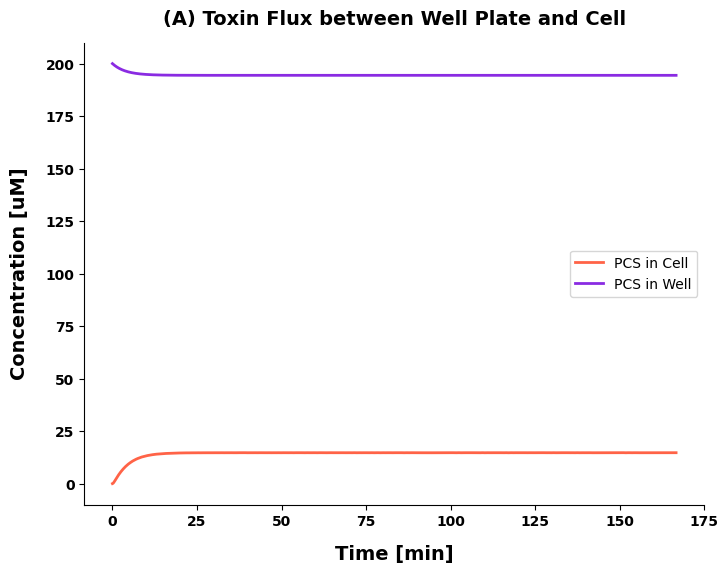

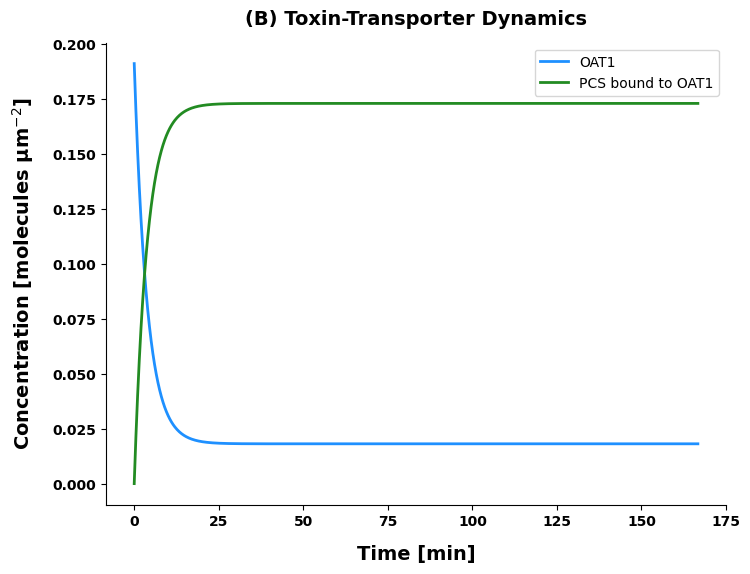

In [13]:
# PCS_B
plt.figure(figsize=(8, 6))
plt.plot(solution1.t / 60, solution1.y[3], label='PCS in Cell', color=colors['PCS_C'], linewidth=2)
plt.plot(solution1.t / 60, solution1.y[0], label='PCS in Well', color=colors['PCS_B'], linewidth=2)      
plt.xlabel('Time [min]', fontsize=14, fontweight='bold', labelpad=12)  # Changed to minutes
plt.ylabel('Concentration [uM]', fontsize=14, fontweight='bold', labelpad=12)
plt.legend()
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
ax = plt.gca()  
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)  
plt.title('(A) Toxin Flux between Well Plate and Cell', fontsize=14, fontweight='bold', pad=13)
plt.legend()
plt.savefig('Result_1.png', dpi=300)
plt.show()

# OAT1, PCS_OAT1
plt.figure(figsize=(8, 6))
plt.plot(solution1.t / 60, solution1.y[1], label='OAT1', color=colors['OAT1'], linewidth=2)       
plt.plot(solution1.t / 60, solution1.y[2], label='PCS bound to OAT1', color=colors['PCS_OAT1'], linewidth=2)   
plt.xlabel('Time [min]', fontsize=14, fontweight='bold', labelpad=12)  # Changed to minutes
plt.ylabel('Concentration [molecules μm$^{-2}$]', fontsize=14, fontweight='bold', labelpad=12)
plt.legend()
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
ax = plt.gca()  
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)  
plt.title('(B) Toxin-Transporter Dynamics', fontsize=14, fontweight='bold', pad=13)
plt.legend()
plt.savefig('Result_1.2.png', dpi=300)
plt.show()


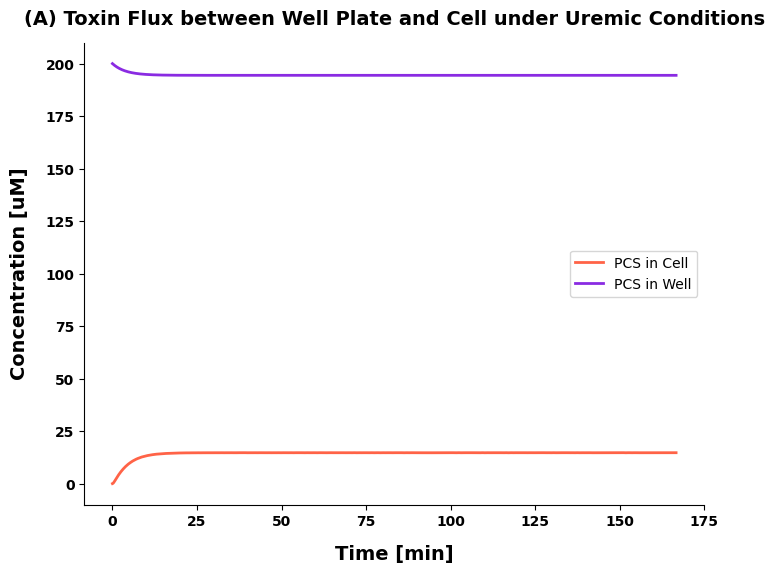

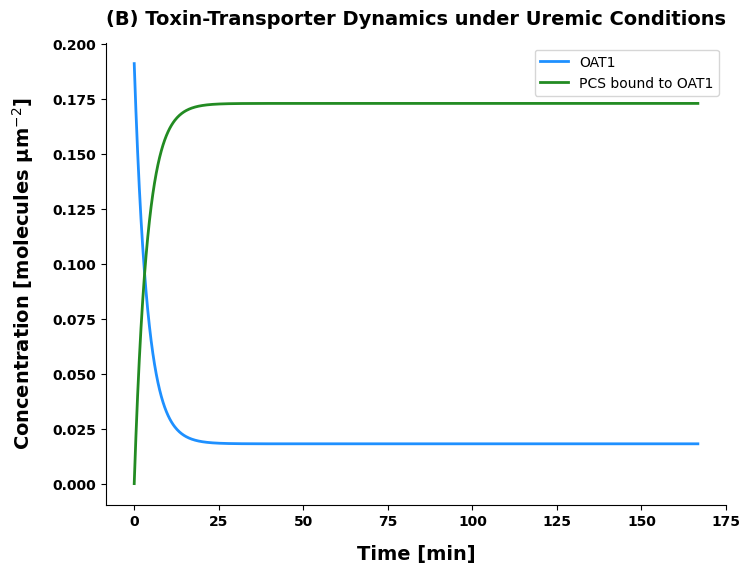

In [14]:
# PCS_B
plt.figure(figsize=(8, 6))
plt.plot(solution1.t / 60, solution1.y[3], label='PCS in Cell', color=colors['PCS_C'], linewidth=2)
plt.plot(solution1.t / 60, solution1.y[0], label='PCS in Well', color=colors['PCS_B'], linewidth=2)      
plt.xlabel('Time [min]', fontsize=14, fontweight='bold', labelpad=12)  # Changed to minutes
plt.ylabel('Concentration [uM]', fontsize=14, fontweight='bold', labelpad=12)
plt.legend()
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
ax = plt.gca()  
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)  
plt.title('(A) Toxin Flux between Well Plate and Cell under Uremic Conditions', fontsize=14, fontweight='bold', pad=13)
plt.legend()
plt.savefig('Result_1.3.png', dpi=300)
plt.show()

# OAT1, PCS_OAT1
plt.figure(figsize=(8, 6))
plt.plot(solution1.t / 60, solution1.y[1], label='OAT1', color=colors['OAT1'], linewidth=2)       
plt.plot(solution1.t / 60, solution1.y[2], label='PCS bound to OAT1', color=colors['PCS_OAT1'], linewidth=2)   
plt.xlabel('Time [min]', fontsize=14, fontweight='bold', labelpad=12)  # Changed to minutes
plt.ylabel('Concentration [molecules μm$^{-2}$]', fontsize=14, fontweight='bold', labelpad=12)
plt.legend()
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
ax = plt.gca()  
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)  
plt.title('(B) Toxin-Transporter Dynamics under Uremic Conditions', fontsize=14, fontweight='bold', pad=13)
plt.legend()
plt.savefig('Result_1.4.png', dpi=300)
plt.show()

In [15]:
# Find the max PCS_C value and its corresponding time
max_PCS_C = np.max(solution1.y[3])
max_time = time_minutes[np.argmax(solution1.y[3])]  # Time corresponding to max PCS_C

# Print the max PCS_C and corresponding time
print(f"Maximum PCS_C: {max_PCS_C:.2f} µM at time: {max_time:.2f} minutes")

Maximum PCS_C: 14.73 µM at time: 117.78 minutes


In [16]:
# Find the max PCS_C value and its corresponding time
min_PCS_B = np.min(solution1.y[0])
min_time = time_minutes[np.argmin(solution1.y[0])]  # Time corresponding to max PCS_C

# Print the max PCS_C and corresponding time
print(f"Minimum PCS_B: {min_PCS_B:.2f} µM at time: {min_time:.2f} minutes")

Minimum PCS_B: 194.42 µM at time: 117.78 minutes
